# Assignment 1 



## <u>**Part 1. Bank Account Application Fraud (40')**</u>

- **<u>Data**</u>: The Bank Account Fraud (BAF) suite of datasets has been published at NeurIPS 2022 and it comprises a total of 6 different synthetic bank account fraud tabular datasets. BAF is a realistic, complete, and robust test bed to evaluate novel and existing methods in ML and fair ML, and the first of its kind!
- **<u>Data for this assignment<u>**: **'bank_account_application.csv'** contains around 13% of the observations which were randomly selected from the raw dataset (1 million obs).

### Libraries


In [66]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn

import warnings
warnings.filterwarnings("ignore")

### Data Loading


In [67]:
d1 = pd.read_csv('bank_account_application.csv')

# To view all columns
pd.set_option('display.max_columns', None)

d1.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.204778,-1,58,40,1.355443,-1.126296,AB,1344,2269.784362,3964.058690,4319.483281,183,5,CD,110,0,BB,0,1,10,0,200.0,0,INTERNET,2.886892,windows,1,1,0,5
1,0,0.9,0.565028,-1,33,20,0.023988,-1.076645,AB,2286,4025.168949,4776.682769,4298.435726,2213,4,CF,196,1,BB,0,1,1,0,200.0,0,INTERNET,2.678654,other,0,1,0,6
2,0,0.6,0.324090,-1,34,40,4.488589,-1.488595,AC,1163,7008.796601,4818.634987,5290.669564,1,8,CA,52,0,BC,0,1,-1,0,200.0,0,INTERNET,5.411762,other,0,0,0,0
3,0,0.4,0.833081,-1,24,30,0.005975,-0.765046,AC,1039,4409.581753,4346.439600,5032.841637,0,12,CA,122,1,BB,0,1,-1,0,500.0,0,INTERNET,2.051803,windows,0,1,0,3
4,0,0.9,0.675715,-1,19,40,0.021723,-1.549065,AB,1040,4358.660242,3215.871466,3093.676694,18,7,CF,106,0,BC,1,1,15,0,200.0,0,INTERNET,2.210978,windows,1,1,0,7


--------------------------------------

#### **Task 1**. Does the data set have any imbalanced issue and why? Please draw an appropriate plot to support your answer. (5')

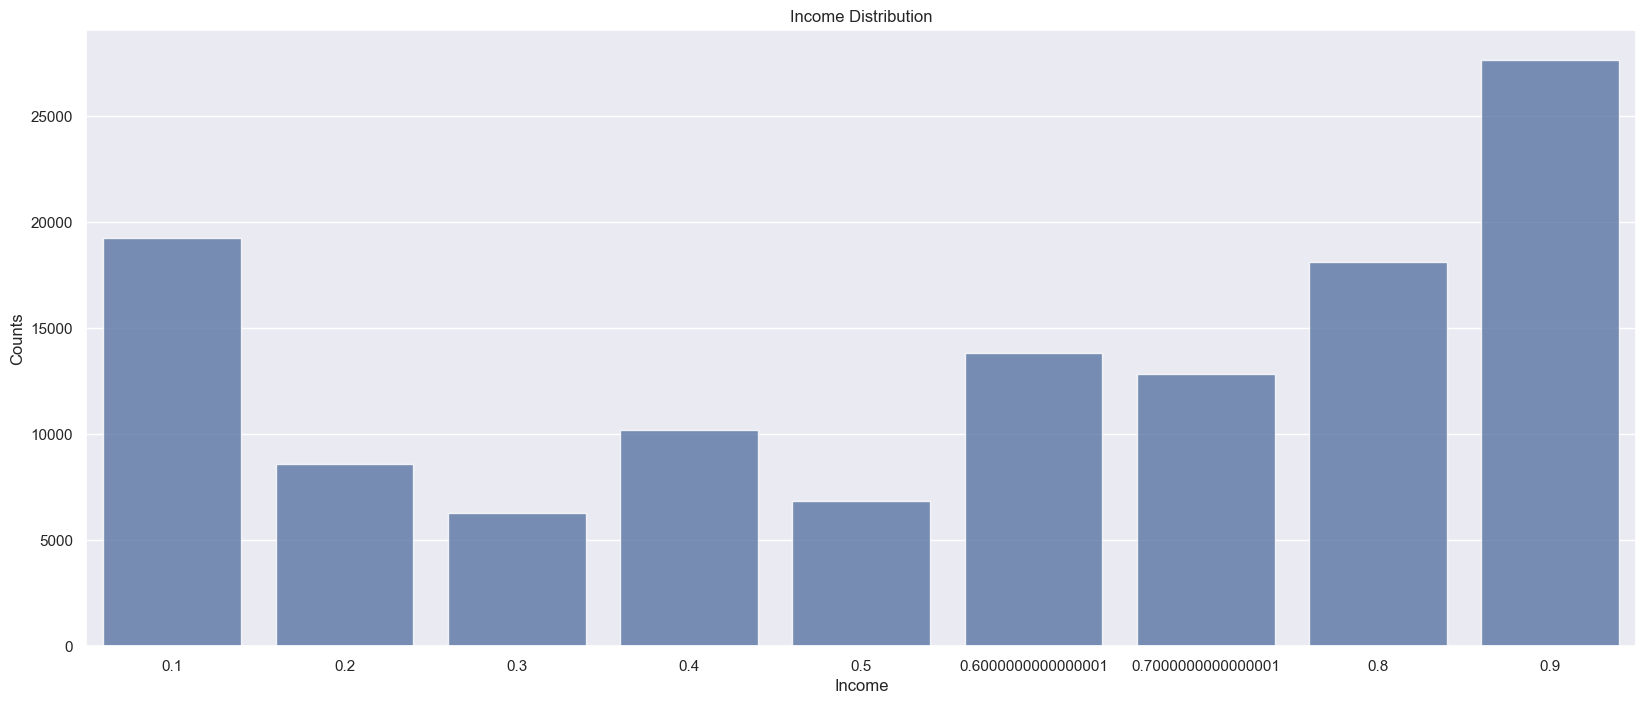

In [68]:
# Code for Task 1 to check the imbalance in the dataset
income_counts=d1['income'].value_counts()
plt.figure(figsize=(20,8))
sns.barplot(x=income_counts.index, y=income_counts.values, alpha=0.8)
plt.title('Income Distribution')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Income', fontsize=12)
plt.show()



##### Answer to Task 1:
Yes, the dataset have imbalanced issues, take example as "income" column.
The bar plot provides a visual representation of the distribution of of 'income' column of the dataset, which refers to the Annual income of the applicant (in decile form) This plot indicates that there is a significant imbalanced issues existing in the dataset:There are much more samples with 0.9 income level than other samples with different income levels. This imbalance could potentially skew any analysis or model training on this dataset, as the model might be overly influenced by the majority class, eg. 0.9 income level. Thus, it is important to address this imbalance before proceeding with further analysis or model training.


--------------------------------------

#### **Task 2**. Detect the outliers of the data set for 5 variables (choose by yourself) based on the Interquartile Range (IQR) method (given below) and handle the outlier for one of the variables (choose by yourself) (5')

In [69]:
# Code for Task 2
def detect_outlier(var):
    # Calculate descriptive statistics of the variable
    stats = var.describe()
    # Compute the Interquartile Range (IQR) which is the difference between the 75th and 25th percentiles
    iqr = stats["75%"] - stats["25%"]
    # Determine the upper and lower limit for outliers 
    upper_limit = stats["75%"] + 1.5 * iqr
    lower_limit = stats["25%"] - 1.5 * iqr
    # Store the upper and lower limits in a variable
    para = (upper_limit, lower_limit)  
    print(f"for {var.name}: the upper and lower limits for non-outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an IQR of {round(iqr, 2)}")
    #calculate number of outliers detected
    tmp = pd.concat([var>upper_limit,var<lower_limit],axis=1)
    # Any row in 'tmp' that has True in either column is considered an outlier
    outlier_index = tmp.any(axis=1)
    print("Num of outlier detected:",outlier_index.value_counts()[1])
    print("Proportion of outlier detected",outlier_index.value_counts()[1]/len(outlier_index))
    print("\n")
    return outlier_index, para

for zip_count_4w: the upper and lower limits for non-outliers are 3522.5 and -681.5, with an IQR of 1051.0
Num of outlier detected: 7302
Proportion of outlier detected 0.05904948285203665




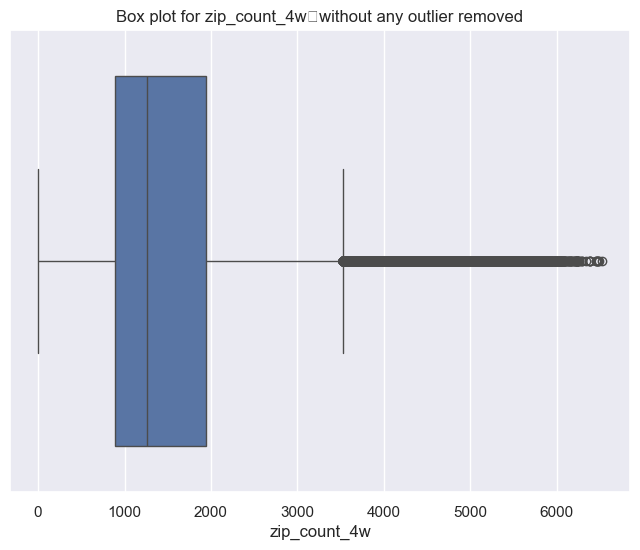

for velocity_6h: the upper and lower limits for non-outliers are 14075.31 and -2944.86, with an IQR of 4255.04
Num of outlier detected: 1036
Proportion of outlier detected 0.008377877873830453




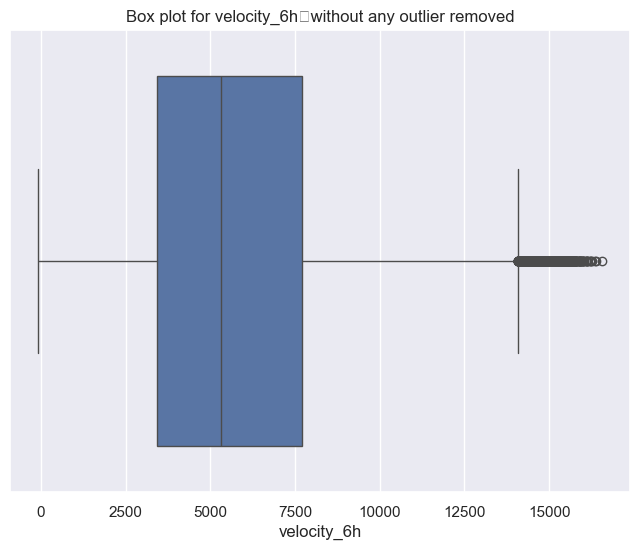

for date_of_birth_distinct_emails_4w: the upper and lower limits for non-outliers are 23.5 and -4.5, with an IQR of 7.0
Num of outlier detected: 1178
Proportion of outlier detected 0.00952619704186513




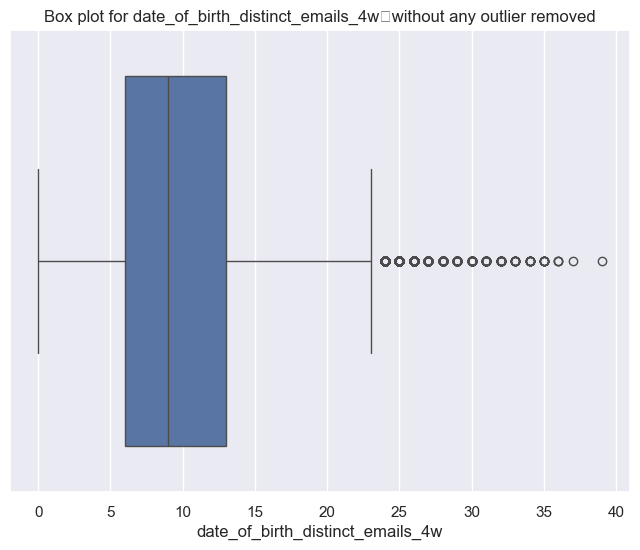

for current_address_months_count: the upper and lower limits for non-outliers are 296.5 and -147.5, with an IQR of 111.0
Num of outlier detected: 5035
Proportion of outlier detected 0.04071680993700418




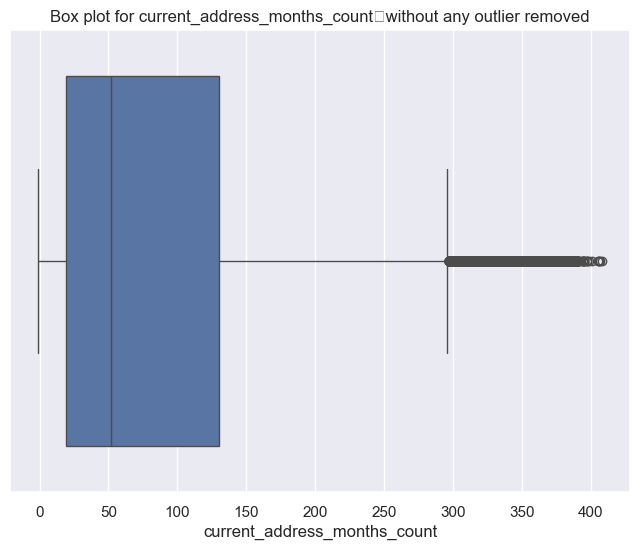

for credit_risk_score: the upper and lower limits for non-outliers are 320.5 and -59.5, with an IQR of 95.0
Num of outlier detected: 1033
Proportion of outlier detected 0.008353617609717045




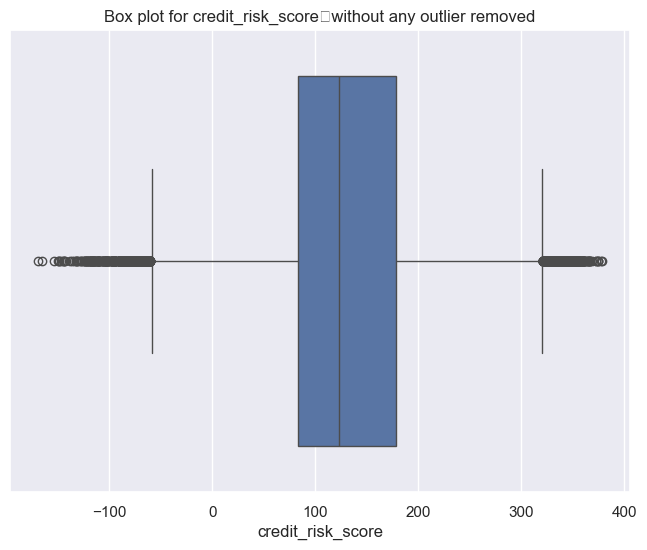

choose column to handle outlier: credit_risk_score


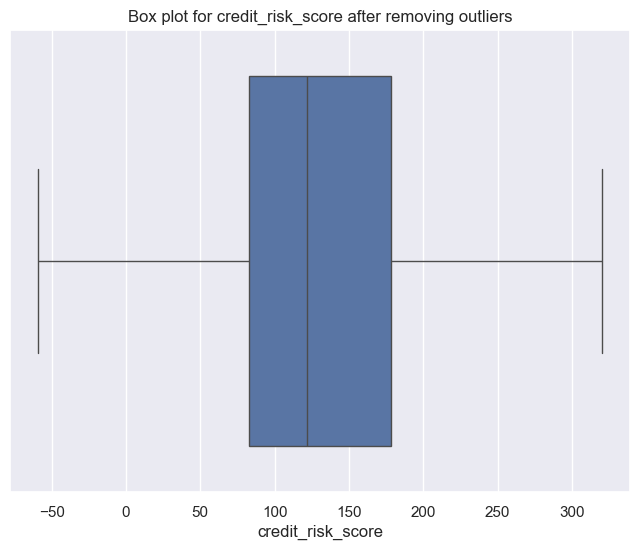

In [70]:
var=['zip_count_4w','velocity_6h','date_of_birth_distinct_emails_4w','current_address_months_count','credit_risk_score']
for i in var:
    outlier_index, para = detect_outlier(d1[i]) #detect the outliers
    plt.figure(figsize=(8,6))
    sns.boxplot(x=d1[i]) #plot the boxplot
    plt.title('Box plot for '+i+'\t'+'without any outlier removed')
    plt.xlabel(i)   
    plt.show()
    
#only remove the outliers for the variable 'proposed_credit_limit'
print('choose column to handle outlier: credit_risk_score')
#remove the outliers
d1=d1[~outlier_index]
#draw the boxplot again
plt.figure(figsize=(8,6))
sns.boxplot(x=d1['credit_risk_score'])
plt.title('Box plot for credit_risk_score after removing outliers')
plt.xlabel('credit_risk_score')
plt.show()


--------------------------------------

#### **Task 3**. Do one-hot encoding for the following features/variables (5')

In [71]:
categorical_columns = [
    'income', 'customer_age', 'payment_type',
    'employment_status', 'housing_status',
    'source', 'device_os', 'month'
]
# Code for Task 3
encoded_d1=pd.get_dummies(d1,columns=categorical_columns,drop_first=True)
encoded_d1.head()

,fraud_bool,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,income_0.2,income_0.3,income_0.4,income_0.5,income_0.6000000000000001,income_0.7000000000000001,income_0.8,income_0.9,customer_age_20,customer_age_30,customer_age_40,customer_age_50,customer_age_60,customer_age_70,customer_age_80,customer_age_90,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,month_1,month_2,month_3,month_4,month_5,month_6,month_7
0,0,0.204778,-1,58,1.355443,-1.126296,1344,2269.784362,3964.058690,4319.483281,183,5,110,0,0,1,10,0,200.0,0,2.886892,1,1,0,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,0,0.565028,-1,33,0.023988,-1.076645,2286,4025.168949,4776.682769,4298.435726,2213,4,196,1,0,1,1,0,200.0,0,2.678654,0,1,0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
2,0,0.324090,-1,34,4.488589,-1.488595,1163,7008.796601,4818.634987,5290.669564,1,8,52,0,0,1,-1,0,200.0,0,5.411762,0,0,0,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,0,0.833081,-1,24,0.005975,-0.765046,1039,4409.581753,4346.439600,5032.841637,0,12,122,1,0,1,-1,0,500.0,0,2.051803,0,1,0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
4,0,0.675715,-1,19,0.021723,-1.549065,1040,4358.660242,3215.871466,3093.676694,18,7,106,0,1,1,15,0,200.0,0,2.210978,1,1,0,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True


--------------------------------------

#### **Task 4**. Do the normalization for certain variables. You should choose the approriate variables for this task by yourself. (5')

In [72]:
# Code for Task 4

from sklearn.preprocessing import MinMaxScaler
print('normalization on the following columns: prev_address_months_count,intended_balcon_amount, zip_count_4w, velocity_6h, velocity_24h,velocity_4w, bank_branch_count_8w, proposed_credit_limit, current_address_months_count, credit_risk_score,session_length_in_minutes')
scaler = sklearn.preprocessing.MinMaxScaler()
var_to_normalize=['prev_address_months_count','intended_balcon_amount','zip_count_4w','velocity_6h','velocity_24h','velocity_4w','bank_branch_count_8w','proposed_credit_limit','current_address_months_count','credit_risk_score','session_length_in_minutes']
encoded_d1[var_to_normalize] = scaler.fit_transform(encoded_d1[var_to_normalize])
print('normalization done')
print(encoded_d1.shape)
encoded_d1.head()





normalization on the following columns: prev_address_months_count,intended_balcon_amount, zip_count_4w, velocity_6h, velocity_24h,velocity_4w, bank_branch_count_8w, proposed_credit_limit, current_address_months_count, credit_risk_score,session_length_in_minutes
normalization done
(122626, 68)


,fraud_bool,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,income_0.2,income_0.3,income_0.4,income_0.5,income_0.6000000000000001,income_0.7000000000000001,income_0.8,income_0.9,customer_age_20,customer_age_30,customer_age_40,customer_age_50,customer_age_60,customer_age_70,customer_age_80,customer_age_90,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,month_1,month_2,month_3,month_4,month_5,month_6,month_7
0,0,0.204778,0.0,0.144254,1.355443,0.111645,0.205982,0.141403,0.326877,0.355992,0.078541,5,0.445910,0,0,1,10,0,0.005236,0,0.046662,1,1,0,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,0,0.565028,0.0,0.083130,0.023988,0.112034,0.350460,0.246901,0.426597,0.350845,0.949785,4,0.672823,1,0,1,1,0,0.005236,0,0.044162,0,1,0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
2,0,0.324090,0.0,0.085575,4.488589,0.108809,0.178221,0.426216,0.431745,0.593496,0.000429,8,0.292876,0,0,1,-1,0,0.005236,0,0.076973,0,0,0,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,0,0.833081,0.0,0.061125,0.005975,0.114473,0.159202,0.270004,0.373800,0.530444,0.000000,12,0.477573,1,0,1,-1,0,0.162304,0,0.036637,0,1,0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
4,0,0.675715,0.0,0.048900,0.021723,0.108335,0.159356,0.266944,0.235065,0.056221,0.007725,7,0.435356,0,1,1,15,0,0.005236,0,0.038547,1,1,0,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True


##### Answer to Task 4:
In this task, I choose those columns with numerical value range over 100 to be normalized.The results are shown above.

--------------------------------------

#### **Task 5**. Split the dataset into 3 subsets - train, validation and test. Please choose the approriate spliting ratio. Y is the fraud_bool. (10')

In [73]:
# Code for Task 5
from sklearn.model_selection import train_test_split
y=encoded_d1['fraud_bool']
x=encoded_d1.drop(['fraud_bool'],axis=1)

train_ration=0.75
validation_ratio=0.15
test_ratio=0.10
#train set 75%, validation set 15%, test set 10%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1-train_ration,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=test_ratio/(test_ratio+validation_ratio),random_state=42)



print('Train set:', x_train.shape, y_train.shape)
print('Validation set:', x_val.shape, y_val.shape)
print('Test set:', x_test.shape, y_test.shape)





Train set: (91969, 67) (91969,)
Validation set: (18394, 67) (18394,)
Test set: (12263, 67) (12263,)


--------------------------------------

#### **Task 6**.  Use the `sklean.SelectKBest` to select the top 10 features based on the f_regression statistic for numerical features. (10')

In [74]:
# Code for Task 6
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#select the top 10 features
selector = SelectKBest(f_regression, k=10)
selector.fit(x_train, y_train)
# Get columns to keep
features_indx= selector.get_support()
features_name=x_train.columns[features_indx]

print("Selected Features:")
for feature in features_name:
    print(feature)



Selected Features:
name_email_similarity
current_address_months_count
date_of_birth_distinct_emails_4w
credit_risk_score
proposed_credit_limit
keep_alive_session
device_distinct_emails_8w
income_0.9
customer_age_60
device_os_windows


--------------------------------------

## <u>**Part 2. Airbnb Review Analysis (30')**</u>

- **<u>Data**</u>: The data **'NYC_airbnb_review.csv'** contains `listing id`, `listing url`, `review date`, and `review content` for the Airbnb listings in NYC. 

### Libraries

In [ ]:
import nltk # natural language toolkit
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')

### Data Loading


In [76]:
df2 = pd.read_csv('NYC_airbnb_review.csv')
df2.head()

,listing_id,url,review_posted_date,review
0,2595,https://www.airbnb.com/rooms/2595,November 2019,"Great location, convenient to everything. Very..."
1,2595,https://www.airbnb.com/rooms/2595,May 2019,Place was so cute and comfy! Host was great an...
2,2595,https://www.airbnb.com/rooms/2595,May 2019,10 / 10 would stay again
3,2595,https://www.airbnb.com/rooms/2595,January 2019,The apartment met expectations to how it was i...
4,2595,https://www.airbnb.com/rooms/2595,December 2018,Great space in a fun old building in NYC. Love...


#### Task 7: Do text-preprocessing for the review content, including tokenization, lowercasing, remove stopwords, remove punctuations, and lemmatization. (15')

In [77]:
# Code for Task 7
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
import string

## tokenize and lower case
df2['review']=df2['review'].fillna("")
df2['review']=df2['review'].tolist()
review_list=[]
for i in df2['review']:
    review_list.append(word_tokenize(i.lower()))
df2['review']=review_list

print('tokenize and lower case done.. And the left first 10 result is:  ')
print(review_list[:10],'\n')

##remove stop words
filtered_review1=[]
for review in review_list:
    filtered_review1.append([word for word in review if word not in stopwords.words('english')])

print('remove stop words done. And the left first 10 result is: ') 
print(filtered_review1[:10],'\n')

##remove punctuation
filtered_review2=[]
for i in filtered_review1:
    filtered_review2.append([word for word in i if word not in string.punctuation])

print('remove punctuation done. And the left first 10 result is:')
print(filtered_review2[:10],'\n')

##lemmatization
lemmatizer=WordNetLemmatizer()
filtered_review3=[]
for i in filtered_review2:
    filtered_review3.append(' '.join([lemmatizer.lemmatize(word,pos='v') for word in i]))
#update the dataframe
df2['review']=filtered_review3

print('lemmatization done. And the left first 10 result is:')
print(filtered_review3[:10])






                            

tokenize and lower case done.. And the left first 10 result is:  
[['great', 'location', ',', 'convenient', 'to', 'everything', '.', 'very', 'cool', 'space', 'and', 'building', '.'], ['place', 'was', 'so', 'cute', 'and', 'comfy', '!', 'host', 'was', 'great', 'and', 'was', 'quick', 'to', 'communicate', 'when', 'i', 'had', 'questions', '.', 'quick', 'walk', 'to', 'the', 'subway', 'and', 'only', 'about', '5', 'min', 'walk', 'to', 'the', 'empire', 'state', 'building', '.', 'overall', 'great', 'stay', 'and', 'host', 'was', 'amazing', '!'], ['10', '/', '10', 'would', 'stay', 'again'], ['the', 'apartment', 'met', 'expectations', 'to', 'how', 'it', 'was', 'insinuated', 'on', 'the', 'ad', '.', 'jennifer', 'is', 'very', 'welcoming', 'and', 'friendly', '.', 'a', 'little', 'pricey', 'for', 'a', '<', '500', 'sq', 'ft', 'space', ',', 'but', 'it', 'is', 'a', 'convenient', 'location', '.', 'if', 'you', 'do', "n't", 'want', 'to', 'walk', 'up', 'a', '4', 'story', 'stair', 'case', 'after', 'an', 'already

#### Task 8: How many of the reviews are positive, negative, and neutral? Follow the below rule. (15')
 - If compound score > 0, a review is counted as positive;
 - If compound score = 0, a review is counted as neutral;
 - If compound score < 0, a review is counted as negative.

In [78]:
# Code for Task 8
# initialize the analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
data=[]

for i,row in df2.iterrows():
    sentiment_score = sid.polarity_scores(row['review'])
    # we want to create a dictionary that stores the review and the negative, neutral, positive, and compound scores that were returned by NLTK.
    dic={}
    dic['review']=row['review']
    dic['sentiment_negative'] = sentiment_score['neg']
    dic['sentiment_neutral'] = sentiment_score['neu']
    dic['sentiment_positive'] = sentiment_score['pos']
    dic['sentiment_compound'] = sentiment_score['compound']
    data.append(dic)
# build a dataframe from the data
sentiment_df = pd.DataFrame(data)
sentiment_df.head()

# Convert continuous variable sentiment_compound to categorical bins
# Define bins
bins = [-float('inf'),-0.01,0.01, float('inf')]
# Define bin labels
labels = ['negative', 'neutral', 'positive']
# Bin data
sentiment_df['sentiment'] = pd.cut(sentiment_df['sentiment_compound'], bins=bins, labels=labels)

sentiment_df.head()

,review,sentiment_negative,sentiment_neutral,sentiment_positive,sentiment_compound,sentiment
0,great location convenient everything cool spac...,0.000,0.439,0.561,0.7506,positive
1,place cute comfy host great quick communicate ...,0.000,0.536,0.464,0.9403,positive
2,10 10 would stay,0.000,1.000,0.000,0.0000,neutral
3,apartment meet expectations insinuate ad jenni...,0.039,0.764,0.197,0.7165,positive
4,great space fun old build nyc love light optio...,0.000,0.408,0.592,0.9118,positive


In [79]:
## count the number of reviews in each sentiment category
sentiment_df['sentiment'].value_counts()


sentiment
positive    16176
negative      660
neutral       608
Name: count, dtype: int64

##### Answer to Task 8:
First,I initialize the analyzer and create a blank dictionary that stores the review and the negative, neutral, positive, and compound scores that were returned by NLTK library. Next, I build a dataframe to showcase the score distribution and label every review according to the categorical bins converted from continuous variable .'sentiment_compound '. In my code, negative infinity to -0.01 will be 'negative' sentiment. -0.01 to 0.01 will be considered as 'neutral' sentiment, and 0.01 to positive infinity will be as 'positive' sentiment.
According to the code and results above, it can conclude that we have 16176 positive reviews, 660 negative reviews and 608 neutral reviews.

## Acknowledgement
Thanks to GitHub Coplot, which helps me fully understand the question and debug, especially in the last task.